<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/DS-Practice-Notebooks/DS04-DL-NLP/TensorFlow_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('CPU'))
print(tf.config.list_logical_devices('TPU'))

[]
[LogicalDevice(name='/device:CPU:0', device_type='CPU')]
[]


In [ ]:
tf.zeros([2,3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.normal([2,3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.08809496,  0.391457  , -0.61286825],
       [ 0.96670157,  0.24832828, -0.33538926]], dtype=float32)>

In [ ]:
tf.ones([1,1])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
!pip install keras

## Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
data=fetch_california_housing()
x=data.data
y=data.target

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df['y']=data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train) # Fit and transform
X_test_scaled=scalar.transform(X_test) # Only transform

In [ ]:
# convert to tensors
X_train_tensor=tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tensor=tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_train_tensor=tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor=tf.convert_to_tensor(y_test, dtype=tf.float32)

In [ ]:
# Model Define

model=Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) #Input layers
model.add(Dense(32, activation='relu')) #Hidden Layers
model.add(Dense(1)) #Output Layers
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compling
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Fit
# Mini batch
model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7058.2031 - mae: 27.9744 - val_loss: 1.9231 - val_mae: 1.1103
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8731 - mae: 1.0317 - val_loss: 1.5021 - val_mae: 0.9258
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4794 - mae: 0.9490 - val_loss: 1.1793 - val_mae: 0.8743
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5845 - mae: 1.0820 - val_loss: 1.0781 - val_mae: 0.7766
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0750 - mae: 0.8086 - val_loss: 0.9902 - val_mae: 0.7416
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1054 - mae: 0.8053 - val_loss: 1.4584 - val_mae: 0.9916
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2716 - mae: 0.8295 - val_loss: 0.8167 - val_mae: 0.6966
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.1167 - mae: 2.0287 - val_loss: 0.7965 - val_mae: 0.6626
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

In [ ]:
model.save('TF_reg.h5')

In [ ]:
model.save('TF_reg.keras')

In [ ]:
# Fit
# Mini batch
model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test))

### Stochastic Gradient Descent (SGD)



```
# Updating bias once per data
```



In [ ]:
model.fit(X_train,y_train, epochs=3, validation_data=(X_test,y_test), batch_size=1)

Epoch 1/3
16512/16512 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.8535 - mae: 0.6943 - val_loss: 0.6547 - val_mae: 0.6131
Epoch 2/3
16512/16512 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.7489 - mae: 0.6477 - val_loss: 0.6833 - val_mae: 0.6755
Epoch 3/3
16512/16512 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.6531 - mae: 0.6030 - val_loss: 0.5813 - val_mae: 0.5594


### Batch Gradient Descent (SGD)



```
# Updating once per whole data
```



In [ ]:
X_train.shape[0]

16512

In [ ]:
model.fit(X_train,y_train, epochs=3, validation_data=(X_test,y_test), batch_size=X_train.shape[0]) #Batch GD

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 0.5675 - mae: 0.5556 - val_loss: 0.5889 - val_mae: 0.5624
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 0.5751 - mae: 0.5587 - val_loss: 0.5947 - val_mae: 0.5648
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 0.5809 - mae: 0.5612 - val_loss: 0.5984 - val_mae: 0.5664


### Mini Batch Gradient Descent (SGD)



```
# Updating bias per mini batch
```



In [ ]:
X_train.shape[0]/64

258.0

In [ ]:
model.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test), batch_size=64) #Batch GD

Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5399 - mae: 0.5492 - val_loss: 0.5234 - val_mae: 0.5469
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4959 - mae: 0.5316 - val_loss: 0.5203 - val_mae: 0.5399
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4943 - mae: 0.5266 - val_loss: 0.5250 - val_mae: 0.5348
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5092 - mae: 0.5315 - val_loss: 0.5081 - val_mae: 0.5312
Epoch 5/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4870 - mae: 0.5251 - val_loss: 0.5099 - val_mae: 0.5235
Epoch 6/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4839 - mae: 0.5194 - val_loss: 0.5094 - val_mae: 0.5303
Epoch 7/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4954 - mae: 0.5221 - val_loss: 0.5171 - val_mae: 0.5235
Epoch 8/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4974 - mae: 0.5230 - val_loss: 0.5179 - val_mae: 0.5448
Epoch 9/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

## Credit Card Fraud Detection

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [1]:
!unzip '/content/credit_card.zip'

Archive:  /content/credit_card.zip
  inflating: creditcard.csv          


In [7]:
df=pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
x=df.drop('Class', axis=1)
y=df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [10]:
#scaling
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train) # Fit and transform
X_test_scaled=scalar.transform(X_test) # Only transform

In [11]:
#Convert to tensorflow tensor
X_train_tensor=tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tensor=tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_train_tensor=tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor=tf.convert_to_tensor(y_test, dtype=tf.float32)

In [20]:
X_train.shape[1]

30

In [37]:
#model building
model=Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#model compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



```
# By default it's a 'Mini batch'
```



In [39]:
#model fit
model.fit(X_train_tensor,y_train_tensor, epochs=5, validation_data=(X_test_tensor,y_test_tensor))

Epoch 1/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9851 - loss: 0.0407 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 2/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 3/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 4/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 5/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0030


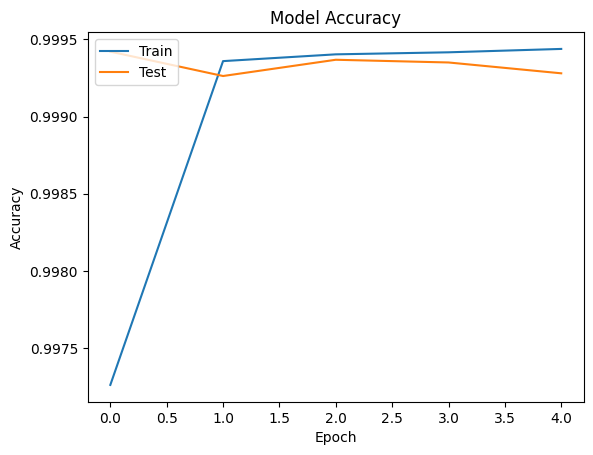

In [40]:
#Plot the accuracy and loss
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(0.5, 0, 'Epoch')

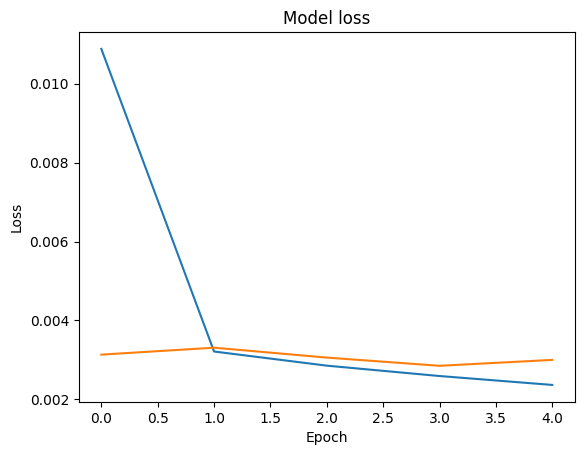

In [41]:
# plot the loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [42]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

In [44]:
y_test_pred_prob=model.predict(X_test_tensor)
y_train_pred_prob=model.predict(X_train_tensor)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [45]:
import numpy as np

y_train_pred=np.where(y_train_pred_prob>0.5,1,0)
y_test_pred=np.where(y_test_pred_prob>0.5,1,0)

In [46]:
y_test_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.92      0.77      0.84       394

    accuracy                           1.00    227845
   macro avg       0.96      0.89      0.92    227845
weighted avg       1.00      1.00      1.00    227845

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



**To stop overfit - We use**:
* Early stop
* Drop out
* Regularization

In [60]:
#model building
model=Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 96 (384.00 B)

In [61]:
#model compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
#model fit
model.fit(X_train_tensor,y_train_tensor, epochs=5, validation_data=(X_test_tensor,y_test_tensor)) #We can add class weights too like this class_weight={0:1,1:9}

Epoch 1/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9582 - loss: 0.1089 - val_accuracy: 0.9993 - val_loss: 0.0116
Epoch 2/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 0.9993 - val_loss: 0.0117
Epoch 3/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9991 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0124
Epoch 4/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0108
Epoch 5/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9993 - val_loss: 0.0107


In [63]:
#Evaluastion metrics
y_test_pred_prob=model.predict(X_test_tensor)
y_train_pred_prob=model.predict(X_train_tensor)

y_train_pred=np.where(y_train_pred_prob>0.5,1,0)
y_test_pred=np.where(y_test_pred_prob>0.5,1,0)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.82      0.80      0.81       394

    accuracy                           1.00    227845
   macro avg       0.91      0.90      0.91    227845
weighted avg       1.00      1.00      1.00    227845

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.80      0.80        98

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

